In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
# Bigger plots.
plt.rcParams["figure.figsize"] = (18,10)

TODO
- what is linear regression
- step by step
- accuracy comparison

<br>

#### The Dataset

In [2]:
df = pd.read_csv("powerproduction.csv")
df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [3]:
#Remove unreasonable power values
zeroVals = df[(df["speed"] > 10) & (df["power"] == 0)].index
df.drop(zeroVals, inplace=True)

In [4]:
#storing speed and power in xy numpy arrays for ease of access.
x = np.array(df["speed"])
y = np.array(df["power"])

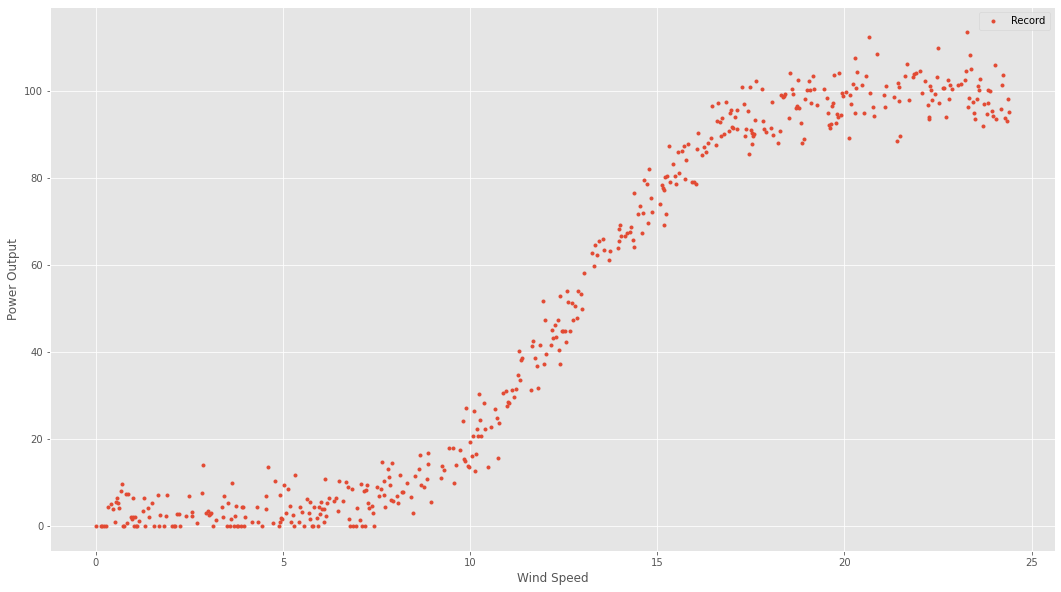

In [5]:
#Plotting the full dataset
plt.plot(x, y,'.', label="Record")
# Add axis labels and a legend.
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()


<br>

#### Making guesses

All straight lines are expressed in the form y = mx + c. With this in mind, we can make some guesses as to what might be the best fit for our linear regression model. Below are three example guesses plotted on top of the dataset.

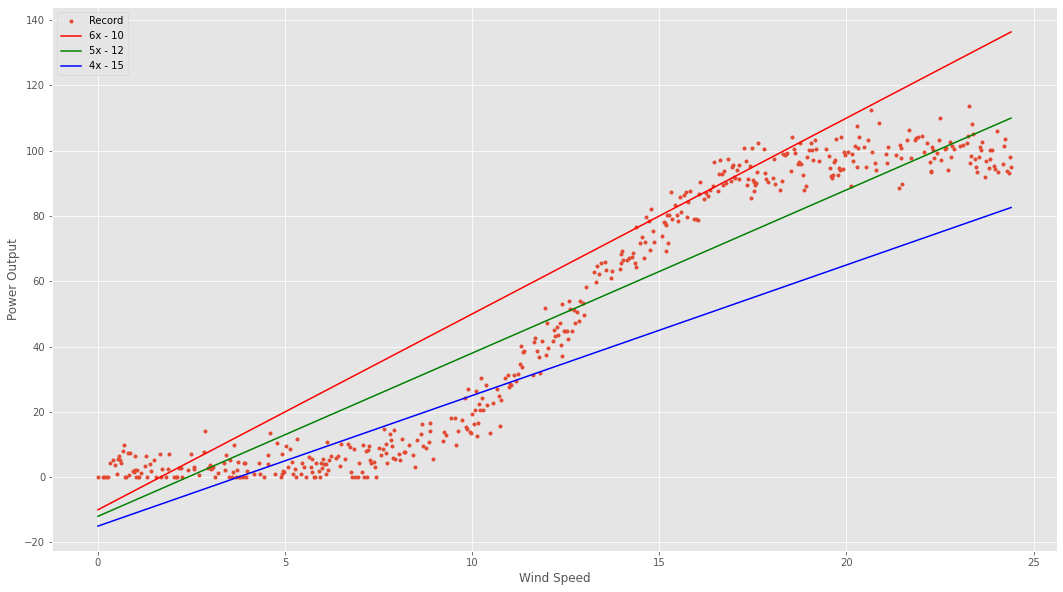

In [6]:
#Plotting the dataset with 3 guess lines.
plt.plot(x, y,'.', label="Record")
plt.plot(x, 6.0 * x - 10.0, 'r-', label="6x - 10")
plt.plot(x, 5.0 * x -  12.0, 'g-', label="5x - 12")
plt.plot(x, 4.0 * x - 15.0, 'b-', label="4x - 15")
# Add axis labels and a legend.
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()

<br>

#### Calculating Cost
All three of these lines could be potential candidates that best suit our data, but we need some value that can tell us how these lines compare and which is the closest to the ideal fit. The function shown below provides this value through a calculation known as *least sqaures fitting*. 

In [7]:
# Calculate the cost of the lines above for the data above.

cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])


print("Cost with m =%5.2f and c = %5.2f: %8.2f" % (6.0, -10.0, cost(6.0, -10.0)))
print("Cost with m =%5.2f and c = %5.2f: %8.2f" % (5.0,  -12.0, cost(5.0, -12.0)))
print("Cost with m =%5.2f and c = %5.2f: %8.2f" % (4.0, -15.0, cost(4.0, -15.0)))

Cost with m = 6.00 and c = -10.00: 186551.04
Cost with m = 5.00 and c = -12.00: 88370.43
Cost with m = 4.00 and c = -15.00: 251878.05


<br>

#### Calculating the best values for m and c
The two calculations shown below can be used to manually calculate the best m and c values for the best fit straight line.

In [8]:
m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) * (x - np.mean(x)))

c =  np.mean(y) - (m * np.mean(x))

m,c

(5.5509908994428185, -18.870090607326816)

<br>

#### Using NumPy to get the best fit.

In [9]:
#using numpy polyfit to find the best line.
linmodel = np.poly1d(np.polyfit(x, y, 1))

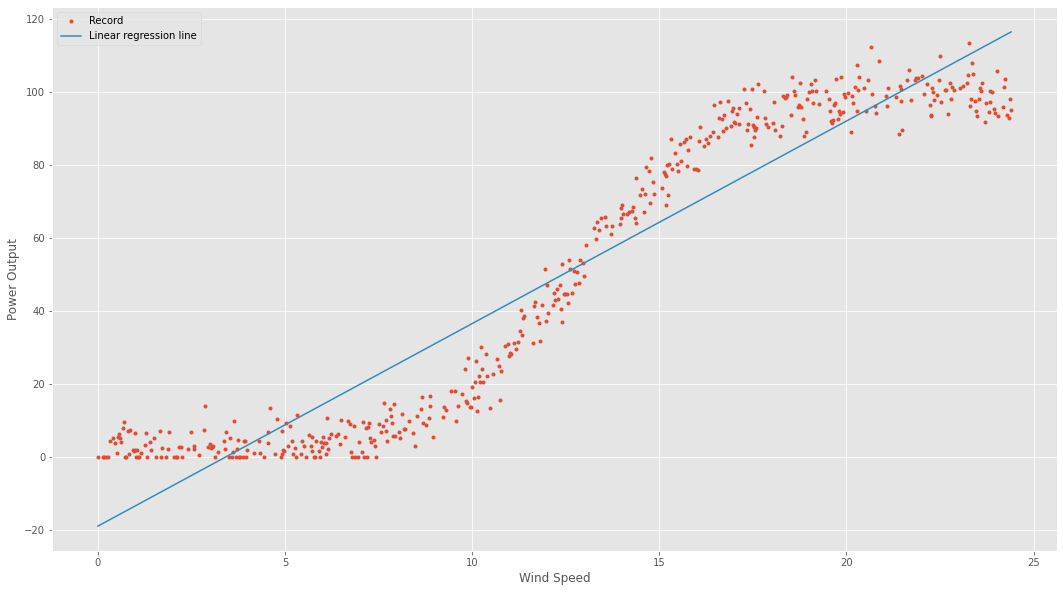

In [10]:
#Plotting the best fit line on the data.
plt.plot(x, y,'.', label="Record")
plt.plot(x, linmodel(x), label="Linear regression line")
# Add axis labels and a legend.
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()

In [11]:
c = linmodel[0]
m = linmodel[1]
print("Cost with m =%5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m = 5.55 and c = -18.87: 80977.03


In [12]:
#calculating r-squared value, 0 = no relation, 1 = 100% related
print(np.corrcoef(y, linmodel(x))[0][1]**2)

0.9025487607456804


<br>

#### Polynomial Regression
***

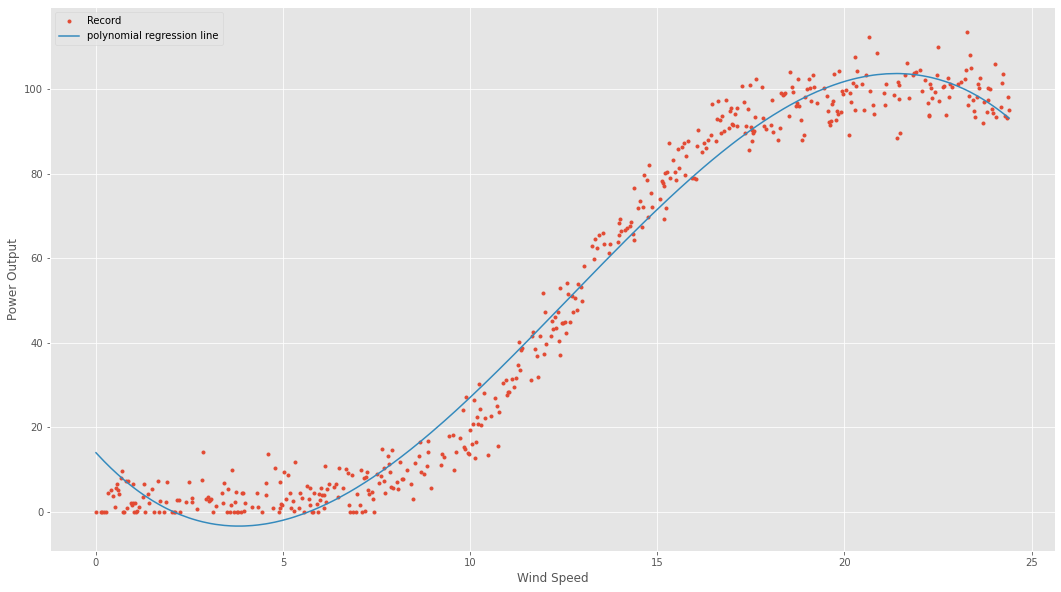

In [49]:
#Creating and plotting line of polynomial regression
polymodel = np.poly1d(np.polyfit(x, y, 3))
plt.plot(x, y,'.', label="Record")
plt.plot(x, polymodel(x), label="polynomial regression line")
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()

In [15]:
#calculating r-squared value, 0 = no relation, 1 = 100% related
print(np.corrcoef(y, polymodel(x))[0][1]**2)

0.9788713742415347


In [38]:
np.poly1d(np.polyfit(x, y, 3))


poly1d([-0.03952068,  1.49377319, -9.67407146, 13.95960249])

In [16]:
#Picking a random record from the dataset
df.loc[256]

speed    12.788
power    50.658
Name: 256, dtype: float64

In [17]:
#Prediction of power at speed of 12.788
power = polymodel(12.788)
print(power)

51.88072390243623


<br>
***

In [43]:
#Logistic function line fitting
def logifunc(x,l,c,k):
    return l / (1 + c*np.exp(-k*x))

#Any reasonable guess 
initialGuess = [100.0,500.0,1.0]

popt, pcov = curve_fit(logifunc, x, y, initialGuess)
print(*popt, pcov)

100.60654764458536 744.0013970273889 0.5208490742253649 [[ 1.85264197e-01 -1.68085853e+01 -2.21881570e-03]
 [-1.68085853e+01  6.92074994e+03  7.55727266e-01]
 [-2.21881570e-03  7.55727266e-01  8.52527987e-05]]


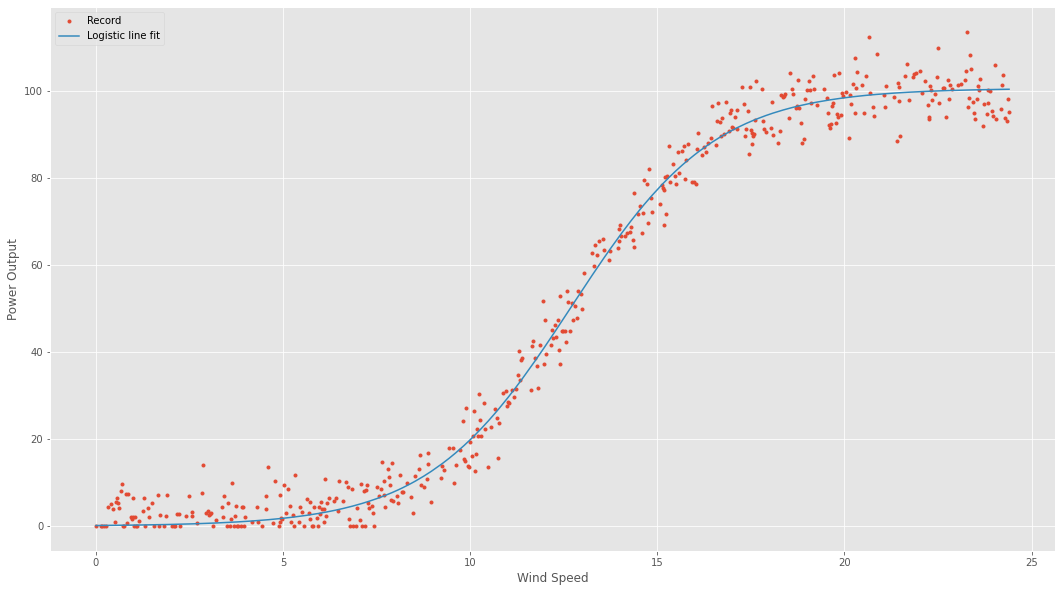

In [19]:
plt.plot(x, y,'.', label="Record")
plt.plot(x, logifunc(x, *popt), label='Logistic line fit')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()

In [20]:
#calculating r-squared value, 0 = no relation, 1 = 100% related
print(np.corrcoef(y, logifunc(x, *popt))[0][1]**2)

0.9899455230206808


In [47]:
logifunc(x, *popt)

array([  0.13504209,   0.14411367,   0.14599974,   0.15180711,
         0.15580626,   0.1599106 ,   0.16627039,   0.17064991,
         0.17523568,   0.17752833,   0.17985092,   0.18220384,
         0.18700227,   0.19192682,   0.19443742,   0.1969808 ,
         0.19955739,   0.20481189,   0.2074907 ,   0.21020447,
         0.21856013,   0.22141835,   0.22431388,   0.22724718,
         0.23021875,   0.23322908,   0.23627869,   0.23936808,
         0.24566827,   0.25876919,   0.26215188,   0.26557867,
         0.2797384 ,   0.28339442,   0.29480392,   0.30255879,
         0.31868391,   0.32284729,   0.32706489,   0.34899098,
         0.35816616,   0.36284348,   0.38715886,   0.39733352,
         0.40252029,   0.41848867,   0.42948315,   0.43508778,
         0.4702779 ,   0.48892118,   0.50856326,   0.51519454,
         0.5496635 ,   0.58642509,   0.59406561,   0.62562993,
         0.64203153,   0.65039184,   0.65886029,   0.66743827,
         0.68492842,   0.71202061,   0.77944355,   0.78